# Metadata

```
Course:   DS 5001 
Module:   06 Lab
Topic:    Similarity and Distance Measures
Author:   R.C. Alvarado
```

# Set Up

In [1]:
data_home = "../data"
data_prefix = 'austen-melville'

In [2]:
OHCO_src = ['book_id', 'chap_id']
OHCO = ['book_id']

In [3]:
import pandas as pd
import numpy as np
import re 
from numpy.linalg import norm
from scipy.spatial.distance import pdist

In [4]:
import seaborn as sns
sns.set(style="ticks")

# Data

## Acquire Data

In [5]:
BOW = pd.read_csv(f"{data_home}/output/{data_prefix}-BOW.csv").set_index(OHCO_src+['term_str'])
VOCAB = pd.read_csv(f'{data_home}/output/{data_prefix}-VOCAB2.csv').set_index('term_str')
LIB = pd.read_csv(f'{data_home}/output/{data_prefix}-LIB.csv').set_index('book_id')

In [6]:
LIB.title = LIB.title.apply(lambda x: x[:20])

In [7]:
BOW

n        tf     tfidf
book_id chap_id term_str                       
105     1       1         2  0.000762  0.001548
                15        1  0.000381  0.001056
                16        1  0.000381  0.001171
                1760      1  0.000381  0.001171
                1784      1  0.000381  0.001171
...                      ..       ...       ...
34970   114     ye        1  0.001550  0.001115
                yes       2  0.003101  0.001555
                yet       1  0.001550  0.000253
                young     2  0.003101  0.001075
                your      1  0.001550  0.000365

[716854 rows x 3 columns]

## Create TFIDIF Matrix

This is a document-term matrix with TFIDF weights.

In [8]:
TFIDF = BOW.tfidf.unstack(fill_value=0)

In [9]:
TFIDF.head()

term_str           0         1   10  100  1000  10000  10440  10800  10th  \
book_id chap_id                                                             
105     1        0.0  0.001548  0.0  0.0   0.0    0.0    0.0    0.0   0.0   
        2        0.0  0.000000  0.0  0.0   0.0    0.0    0.0    0.0   0.0   
        3        0.0  0.000000  0.0  0.0   0.0    0.0    0.0    0.0   0.0   
        4        0.0  0.000000  0.0  0.0   0.0    0.0    0.0    0.0   0.0   
        5        0.0  0.000000  0.0  0.0   0.0    0.0    0.0    0.0   0.0   

term_str         118952  ...  zoroaster  zozo  zuma  zur    à  æneas  æniad  \
book_id chap_id          ...                                                  
105     1           0.0  ...        0.0   0.0   0.0  0.0  0.0    0.0    0.0   
        2           0.0  ...        0.0   0.0   0.0  0.0  0.0    0.0    0.0   
        3           0.0  ...        0.0   0.0   0.0  0.0  0.0    0.0    0.0   
        4           0.0  ...        0.0   0.0   0.0  0.0  0.0    0.0    0.0   
        5           0.0  ...        0.0   0.0   0.0  0.0  0.0    0.0    0.0   

term_str         æson  æsops  ł20000  
book_id chap_id                       
105     1         0.0    0.0     0.0  
        2         0.0    0.0     0.0  
        3         0.0    0.0     0.0  
        4         0.0    0.0     0.0  
        5         0.0    0.0     0.0  

[5 rows x 39424 columns]

## Reduce VOCAB 

In [10]:
sum_method = 'dfidf'
cut_off = VOCAB[sum_method].quantile(.9)

In [11]:
cut_off

51.30964616279745

In [12]:
SIGS = (VOCAB[sum_method] >= cut_off) & (VOCAB.stop == 0)

In [13]:
VOCAB_SHORT = VOCAB.loc[SIGS]

In [14]:
VOCAB_SHORT

,term_rank,n,n_chars,p,i,max_pos,n_pos,stop,stem_porter,stem_snowball,...,max_pos_group,term_rank2,zipf_k,zipf_k2,df,idf,tfidf_mean,tfidf_max,dfidf,dfidf2
term_str,,,,,,,,,,,,,,,,,,,,,
one,39,6855,3,0.003456,8.176840,CD,18,0,one,one,...,CD,39,267345,267345,1058.0,0.048866,0.000198,0.006981,51.700265,0.043666
would,41,6369,5,0.003211,8.282930,MD,12,0,would,would,...,MD,41,261129,261129,981.0,0.081683,0.000274,0.002917,80.130724,0.067678
could,51,5446,5,0.002745,8.508800,MD,10,0,could,could,...,MD,51,277746,277746,834.0,0.152186,0.000453,0.001608,126.922834,0.107198
said,57,4487,4,0.002262,8.788246,VBD,12,0,said,said,...,VB,57,255759,255759,782.0,0.180145,0.000559,0.006212,140.873350,0.118981
upon,60,4241,4,0.002138,8.869593,IN,12,0,upon,upon,...,IN,60,254460,254460,931.0,0.104402,0.000318,0.016062,97.198282,0.082093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
appearances,4678,33,11,0.000017,15.875387,NNS,6,0,appear,appear,...,NN,745,154374,24585,33.0,1.554838,0.000861,0.002492,51.309646,0.043336
relish,4718,33,6,0.000017,15.875387,NN,4,0,relish,relish,...,NN,745,155694,24585,33.0,1.554838,0.001000,0.003329,51.309646,0.043336
elbow,4732,33,5,0.000017,15.875387,NN,5,0,elbow,elbow,...,NN,745,156156,24585,33.0,1.554838,0.000868,0.002723,51.309646,0.043336


In [15]:
TFIDF = TFIDF[VOCAB_SHORT.index]

In [16]:
TFIDF

term_str              one     would     could      said      upon      like  \
book_id chap_id                                                               
105     1        0.000205  0.000187  0.000754  0.000000  0.000000  0.000078   
        2        0.000099  0.000579  0.000540  0.000183  0.000000  0.000157   
        3        0.000121  0.000346  0.000322  0.000444  0.000110  0.000000   
        4        0.000190  0.000407  0.001012  0.000000  0.000000  0.000000   
        5        0.000132  0.000270  0.000458  0.000271  0.000157  0.000093   
...                   ...       ...       ...       ...       ...       ...   
34970   110      0.000149  0.000124  0.000000  0.000274  0.000317  0.000157   
        111      0.000270  0.000151  0.000000  0.000166  0.000385  0.000000   
        112      0.000519  0.000124  0.000000  0.000000  0.000792  0.000156   
        113      0.000000  0.000000  0.000000  0.000000  0.000549  0.000271   
        114      0.000303  0.000127  0.000000  0.000000  0.000486  0.000000   

term_str             must       man      much        mr  ...  subtle  wheel  \
book_id chap_id                                          ...                  
105     1        0.000237  0.000253  0.000172  0.000951  ...     0.0    0.0   
        2        0.000378  0.000135  0.000534  0.001265  ...     0.0    0.0   
        3        0.000307  0.000421  0.000372  0.003872  ...     0.0    0.0   
        4        0.000276  0.000515  0.000083  0.000277  ...     0.0    0.0   
        5        0.000262  0.000040  0.000408  0.000902  ...     0.0    0.0   
...                   ...       ...       ...       ...  ...     ...    ...   
34970   110      0.000378  0.000000  0.000000  0.000000  ...     0.0    0.0   
        111      0.000000  0.000123  0.000000  0.000000  ...     0.0    0.0   
        112      0.000000  0.000000  0.000000  0.000000  ...     0.0    0.0   
        113      0.000000  0.000000  0.000000  0.000000  ...     0.0    0.0   
        114      0.000000  0.000000  0.000000  0.000000  ...     0.0    0.0   

term_str         successful  outlandish    valued  appearances  relish  elbow  \
book_id chap_id                                                                 
105     1               0.0         0.0  0.000592     0.000000     0.0    0.0   
        2               0.0         0.0  0.000000     0.000000     0.0    0.0   
        3               0.0         0.0  0.000000     0.000000     0.0    0.0   
        4               0.0         0.0  0.000000     0.000861     0.0    0.0   
        5               0.0         0.0  0.000000     0.000000     0.0    0.0   
...                     ...         ...       ...          ...     ...    ...   
34970   110             0.0         0.0  0.000000     0.000000     0.0    0.0   
        111             0.0         0.0  0.000000     0.000000     0.0    0.0   
        112             0.0         0.0  0.000000     0.000000     0.0    0.0   
        113             0.0         0.0  0.000000     0.000000     0.0    0.0   
        114             0.0         0.0  0.000000     0.000000     0.0    0.0   

term_str         avail  traced  
book_id chap_id                 
105     1          0.0     0.0  
        2          0.0     0.0  
        3          0.0     0.0  
        4          0.0     0.0  
        5          0.0     0.0  
...                ...     ...  
34970   110        0.0     0.0  
        111        0.0     0.0  
        112        0.0     0.0  
        113        0.0     0.0  
        114        0.0     0.0  

[1184 rows x 3902 columns]

## Collapse Bags

We want to work with larger bags in this notebook, in order to better visualize our resulting clusters.

In [17]:
TFIDF = TFIDF.groupby(OHCO).mean()

In [18]:
TFIDF

term_str,one,would,could,said,upon,like,must,man,much,mr,...,subtle,wheel,successful,outlandish,valued,appearances,relish,elbow,avail,traced
book_id,,,,,,,,,,,,,,,,,,,,,
105,0.000138,0.000349,0.000804,0.000331,0.000083,0.000092,0.000352,0.000217,0.000369,0.001425,...,0.000000,0.000000,0.000027,0.000000,0.000086,0.000076,0.000000,0.000011,0.000023,0.000000
121,0.000132,0.000316,0.000711,0.000419,0.000117,0.000132,0.000307,0.000158,0.000327,0.001044,...,0.000000,0.000000,0.000052,0.000000,0.000063,0.000070,0.000013,0.000024,0.000018,0.000017
141,0.000113,0.000402,0.000824,0.000438,0.000086,0.000124,0.000388,0.000112,0.000433,0.001485,...,0.000000,0.000012,0.000039,0.000000,0.000038,0.000000,0.000008,0.000024,0.000011,0.000016
158,0.000134,0.000426,0.000797,0.000503,0.000101,0.000118,0.000444,0.000187,0.000463,0.003576,...,0.000000,0.000000,0.000030,0.000000,0.000045,0.000032,0.000009,0.000012,0.000021,0.000000
161,0.000130,0.000357,0.000737,0.000611,0.000081,0.000071,0.000291,0.000142,0.000362,0.000687,...,0.000000,0.000000,0.000015,0.000000,0.000080,0.000022,0.000020,0.000000,0.000030,0.000011
946,0.000061,0.000235,0.000410,0.000087,0.000036,0.000054,0.000442,0.000165,0.000381,0.002179,...,0.000000,0.000000,0.000000,0.000000,0.000056,0.000056,0.000000,0.000000,0.000065,0.000000
1212,0.000188,0.000233,0.000308,0.000668,0.000020,0.000042,0.000314,0.000052,0.000248,0.000335,...,0.000000,0.000000,0.000000,0.000054,0.000013,0.000000,0.000062,0.000000,0.000022,0.000000
1342,0.000112,0.000327,0.000640,0.000602,0.000067,0.000069,0.000306,0.000163,0.000422,0.003322,...,0.000000,0.000000,0.000045,0.000000,0.000067,0.000015,0.000000,0.000000,0.000015,0.000016
1900,0.000225,0.000215,0.000331,0.000084,0.000413,0.000149,0.000069,0.000075,0.000115,0.000010,...,0.000000,0.000015,0.000009,0.000091,0.000009,0.000048,0.000061,0.000027,0.000121,0.000046


## Create DOC table

We want to create a new table that flattens the OHCO levels to a single doc_id. We do this so that when we create a table to store pairs of docs and their distances, we can use a single-valued ID for each docs. 

This table will also be used to store cluster assignments.

All of this will become clearer below!

In [19]:
DOC = pd.DataFrame(dict(book_id=TFIDF.index))
DOC.index.name = 'doc_id'

In [20]:
DOC.head()

,book_id
doc_id,
0,105
1,121
2,141
3,158
4,161


## Add a meaningful Title to DOC index

This will be useful for labeling our visualizations.

In [21]:
DOC['title'] = DOC.book_id.map(LIB.author) \
    + '-' + DOC[OHCO].apply(lambda x: x.astype('str').str.cat(sep='-'), 1) \
    + ': '+ DOC.book_id.map(LIB.title) 

In [22]:
DOC.head()

,book_id,title
doc_id,,
0,105,"AUSTEN, JANE-105: PERSUASION"
1,121,"AUSTEN, JANE-121: NORTHANGER ABBEY"
2,141,"AUSTEN, JANE-141: MANSFIELD PARK"
3,158,"AUSTEN, JANE-158: EMMA"
4,161,"AUSTEN, JANE-161: SENSE AND SENSIBILIT"


## Create Normalized Tables

In [23]:
L0 = TFIDF.astype('bool').astype('int') # Binary (Pseudo L)
L1 = TFIDF.apply(lambda x: x / x.sum(), 1) # Probabilistic
L2 = TFIDF.apply(lambda x: x / norm(x), 1) # Pythagorean

In [24]:
# ((L2.T)**2).sum()

## Create Doc Pair Table

Create a table to store our results.

Note that `pist()` is a "distance matrix computation from a collection of raw observation vectors stored in a rectangular array".

In [25]:
PAIRS = pd.DataFrame(index=pd.MultiIndex.from_product([DOC.index.tolist(), DOC.index.tolist()])).reset_index()
PAIRS = PAIRS[PAIRS.level_0 < PAIRS.level_1].set_index(['level_0','level_1'])
PAIRS.index.names = ['doc_a', 'doc_b']

In [26]:
PAIRS.shape

(153, 0)

In [27]:
PAIRS.head()

Empty DataFrame
Columns: []
Index: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]

## Compute Distances

In [28]:
combos  = [
    (TFIDF, 'cityblock', 'cityblock'),
#     (TFIDF, 'euclidean', 'euclidean'),
    (TFIDF, 'cosine', 'cosine'),
    (L0, 'jaccard', 'jaccard'),
#     (L0, 'dice', 'dice'),
    (L1, 'jensenshannon', 'js'),
#     (L2, 'euclidean', 'euclidean2')    
]

In [29]:
for X, metric, label in combos:
    PAIRS[label] = pdist(X, metric)

In [30]:
PAIRS.head(20).style.background_gradient(cmap='YlGnBu', high=.5)

In [31]:
PAIRS.corr().style.background_gradient(cmap='YlGnBu')

,cityblock,cosine,jaccard,js
cityblock,1.000000,0.802634,0.573594,0.990403
cosine,0.802634,1.000000,0.322264,0.800686
jaccard,0.573594,0.322264,1.000000,0.654327
js,0.990403,0.800686,0.654327,1.000000


## Compare Distributions

In [32]:
if PAIRS.shape[0] > 1000:
    SAMPLE = PAIRS.sample(1000)
else:
    SAMPLE = PAIRS

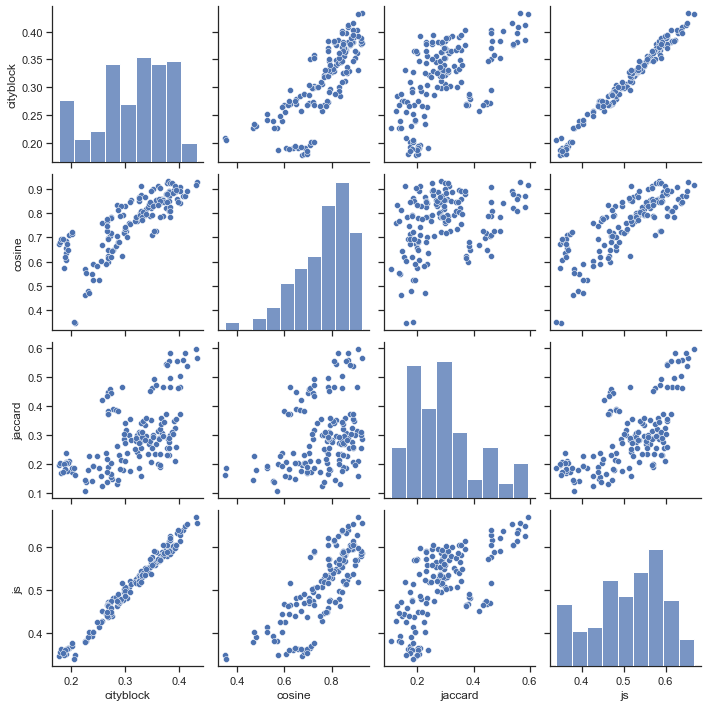

In [33]:
sns.pairplot(SAMPLE);

In [34]:
PAIRS.sort_values('cosine').head(20).style.background_gradient('YlGn', high=1)

# Create Clusters

## Hiearchical

In [35]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [36]:
def hca(sims, linkage_method='complete', color_thresh=.3, figsize=(10, 10)):
    tree = sch.linkage(sims, method=linkage_method)
    labels = DOC.title.values
    plt.figure()
    fig, axes = plt.subplots(figsize=figsize)
    dendrogram = sch.dendrogram(tree, 
                                labels=labels, 
                                orientation="left", 
                                count_sort=True,
                                distance_sort=True,
                                above_threshold_color='.75',
                                color_threshold=color_thresh
                               )
    plt.tick_params(axis='both', which='major', labelsize=14)

<Figure size 432x288 with 0 Axes>

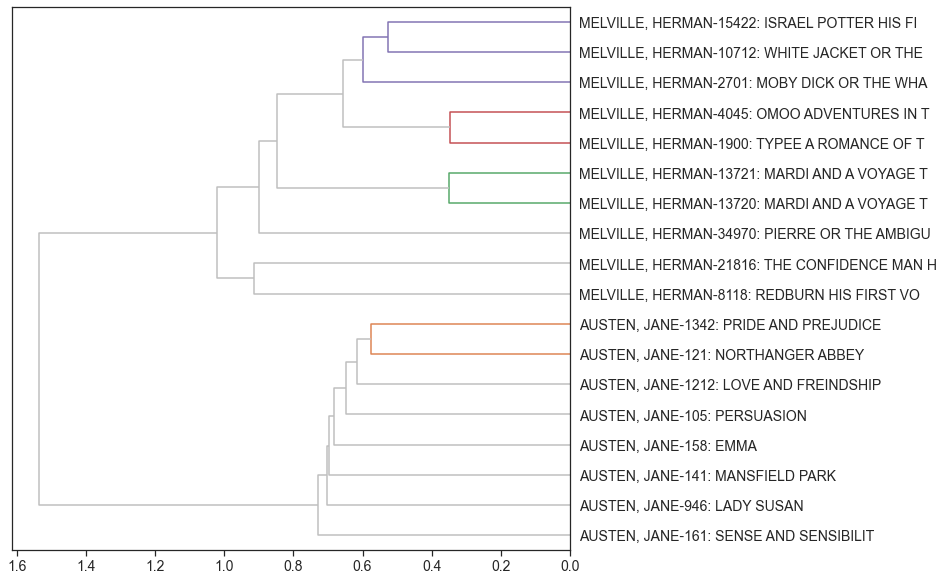

In [37]:
hca(PAIRS.cosine, linkage_method='ward', color_thresh=.6)

<Figure size 432x288 with 0 Axes>

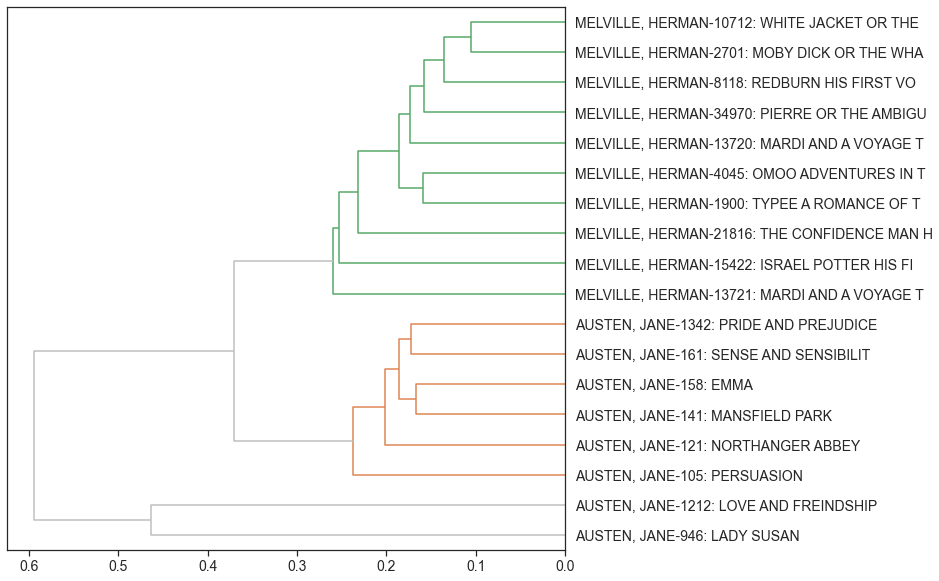

In [39]:
hca(PAIRS.jaccard, color_thresh=.3);

<Figure size 432x288 with 0 Axes>

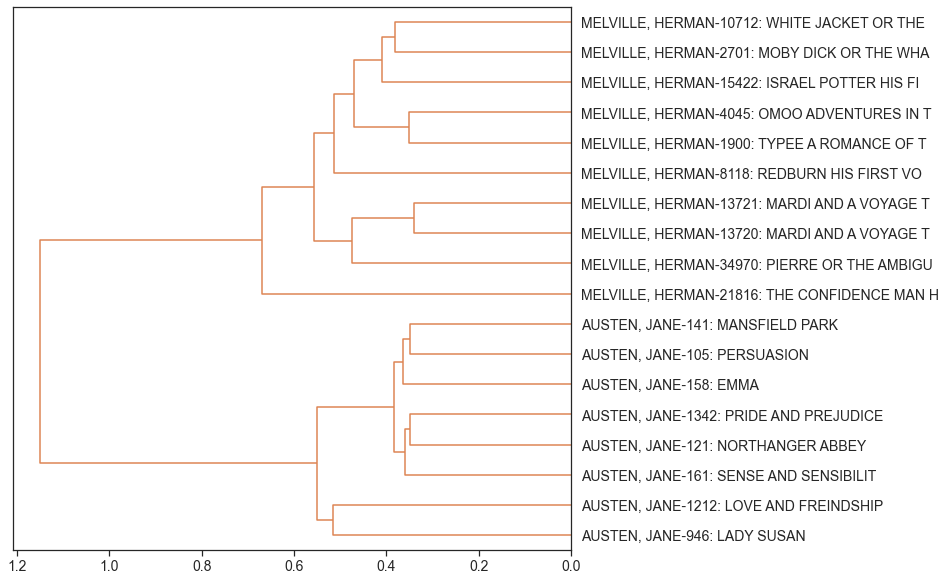

In [41]:
hca(PAIRS.js, linkage_method='ward', color_thresh=48);

<Figure size 432x288 with 0 Axes>

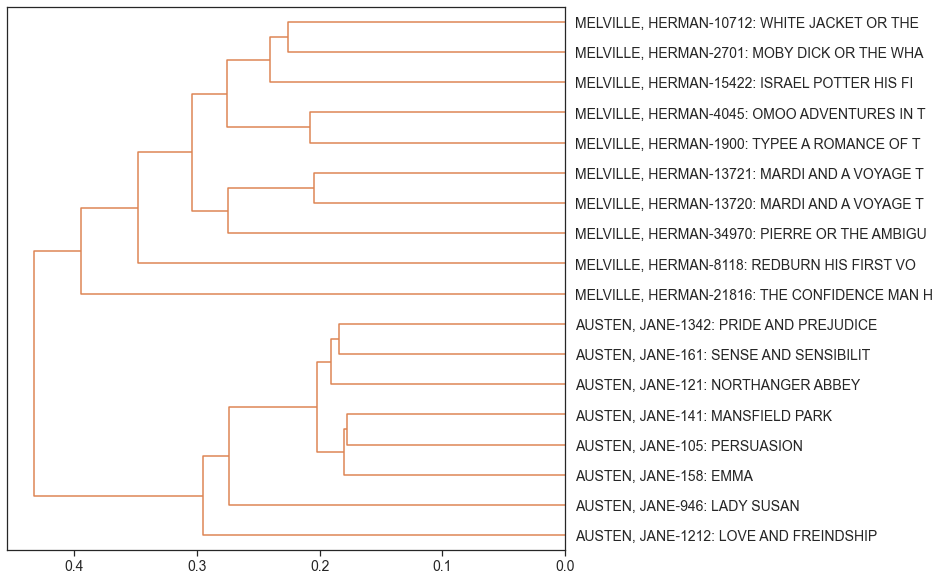

In [42]:
hca(PAIRS.cityblock, color_thresh=2200);

<Figure size 432x288 with 0 Axes>

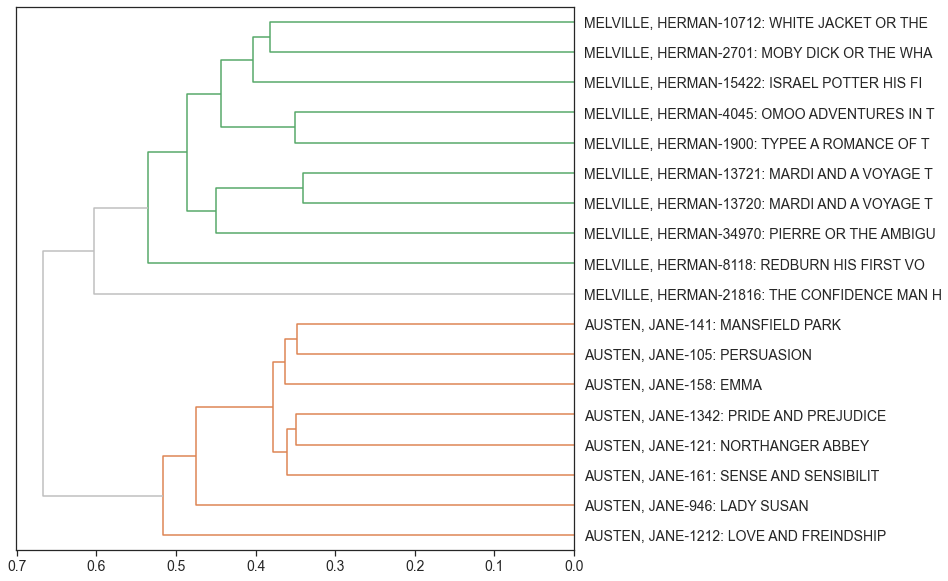

In [43]:
hca(PAIRS.js, color_thresh=.6);

## K-Means

K-Means *only* uses Euclidean distance. Why?

* The K-Means procedure does not explicitly use pairwise distances between data points. 
* Instead, it repeatedly assigns points to the closest centroid thereby using Euclidean distance from data points to a centroid. 
* However, K-Means is *implicitly* based on pairwise Euclidean distances between data points, because the sum of squared deviations from centroid is equal to the sum of pairwise squared Euclidean distances divided by the number of points. 
* The term "centroid" is itself from Euclidean geometry. It is multivariate mean in Euclidean space. Euclidean space is about euclidean distances. Non-Euclidean distances will generally not span Euclidean space. That's why K-Means is for Euclidean distances only.

See the [Cross Validated](https://stats.stackexchange.com/questions/81481/why-does-k-means-clustering-algorithm-use-only-euclidean-distance-metric) post on this.

In [44]:
from sklearn.cluster import KMeans

In [45]:
n_clusters = 6

In [46]:
DOC['y_raw'] = KMeans(n_clusters).fit_predict(TFIDF)
DOC['y_L0'] = KMeans(n_clusters).fit_predict(L0)
DOC['y_L1'] = KMeans(n_clusters).fit_predict(L1)
DOC['y_L2'] = KMeans(n_clusters).fit_predict(L2)

In [48]:
DOC.iloc[:,1:].sort_values('title').style.background_gradient(cmap='YlGn')

,title,y_raw,y_L0,y_L1,y_L2
doc_id,,,,,
0,"AUSTEN, JANE-105: PERSUASION",3,5,0,0
6,"AUSTEN, JANE-1212: LOVE AND FREINDSHIP",3,2,1,0
1,"AUSTEN, JANE-121: NORTHANGER ABBEY",3,1,0,0
7,"AUSTEN, JANE-1342: PRIDE AND PREJUDICE",3,1,0,0
2,"AUSTEN, JANE-141: MANSFIELD PARK",3,5,0,0
3,"AUSTEN, JANE-158: EMMA",3,1,0,0
4,"AUSTEN, JANE-161: SENSE AND SENSIBILIT",3,1,0,0
5,"AUSTEN, JANE-946: LADY SUSAN",5,3,3,0
12,"MELVILLE, HERMAN-10712: WHITE JACKET OR THE",2,0,1,3


# Experimental

## Graph

Here we write out own agglomerative clustering algorithm. 
It builds a graph from the TFIDF table (which is effectively the DOC table) 
and the PAIRS table of distances between all pairs of docs.

In [ ]:
def get_hac_graph(dist_measure = 'cityblock'):

    global TFIDF, PAIRS

    D = TFIDF.reset_index(drop=True).copy()
    P = PAIRS[[dist_measure]].copy()

    # This represents the parent-child egdges between documents and clusters
    # and between clusters and clusters. It will grow with the algorithm.
    EDGES = pd.DataFrame(index=D.index)
    EDGES['c'] = None
    
    
    # This represnets the nodes, starting with the documents. It will be 
    # be augmented by clusters which will behave as documents, having vectors
    # of term weights based on averages of its children.
    NODES = pd.DataFrame(index=D.index)
    NODES['type'] = 'doc'
    NODES['label'] = LIB.loc[TFIDF.index].reset_index().title
    NODES['source'] = LIB.loc[TFIDF.index].reset_index().author
    NODES.source = NODES.source.apply(lambda x: x.split(',')[0].lower())

    L = len(P) # The initial length of the PAIRS table
    N = len(D) # The initial number of documents

    cid = N - 1 # To be used for newly created clusters, whose IDs

    while 1:

        # Find closest pair of documents (or clusters)
        d1, d2 = P[dist_measure].idxmin(1)

        # Assign a parent node to this pair
        cid += 1
        EDGES.loc[[d1,d2], 'c'] = cid
        EDGES.loc[[d1,d2], 'dist'] = P[dist_measure].min()
        
        # Add this node to the edges tables with no parent
        EDGES = EDGES.append(pd.DataFrame(dict(c=None), index=[cid]))

        # Update nodes
        NODES = NODES.append(pd.DataFrame({'type':'cluster', 'label':f"C{cid}", 'source':'algo'}, index=[cid]))

        # Get new doc
        d3 = pd.DataFrame([D.loc[[d1,d2]].mean()], index=[cid])

        # Update docs 
        D = D.append(d3)
        D = D.drop(d1)
        D = D.drop(d2)

        # Update pairs
        q = f'doc_a == {d1} or doc_a == {d2} or doc_b == {d1} or doc_b == {d2}'
        P = P.drop(P.query(q).index)

        # Append new pairs
        try:
            my_pairs = pd.DataFrame(index=pd.MultiIndex.from_tuples([(idx, cid) for idx in D.index if idx != cid]))
            my_pairs.index.names = ['doc_a', 'doc_b']
            my_pairs[dist_measure] = None
            P = P.append(my_pairs)
            P[dist_measure] = pdist(D, dist_measure)
        except:
            break

    EDGES = EDGES.dropna().copy()
    EDGES['z'] = (EDGES.dist - EDGES.dist.mean()) / EDGES.dist.std()
    return NODES, EDGES

In [ ]:
def print_graph(NODES, EDGES, fname='test-tree'):

    global TFIDF

    N = len(TFIDF)
    
    shapes = {'doc': 'rectangle', 'cluster': 'circle'}
    colors = {'austen': 'green', 'melville': 'red', 'algo':'gray'}

    nodes = '\n'.join(NODES.apply(lambda x: f'{x.name} [label="{x.label}", color="{colors[x.source]}", shape="{shapes[x.type]}"]', 1).to_list())
    edges = '\n'.join(EDGES.sort_values('c').apply(lambda x: f'{x.name} -> {int(x.c)} [label="{round(x.z,4)}", len={round(x.dist * 100, 2)}]', 1).to_list())

    graph = """
    digraph G {{
    rankdir=LR
    # NODES
    {0}
    # EDGES
    {1}
    {{rank=same; {2} }}
    }}
    """.format(nodes, edges, ';'.join([str(i) for i in range(N)]))

    with open(f"{data_home}/output/{fname}.dot", 'w') as out:
        out.write(graph)

In [ ]:
dist_measure = 'cosine'

In [ ]:
NODES, EDGES = get_hac_graph(dist_measure=dist_measure)

In [ ]:
NODES.head()

In [ ]:
print_graph(NODES, EDGES, f"test-{dist_measure}")

In [ ]:
import os

graph_types = 'dot fdp'.split()
for gt in graph_types:
    cmd = f"dot -Tpng {data_home}/output/test-{dist_measure}.dot -K{gt} > {data_home}/output/test-{dist_measure}-{gt}.png; {data_home}/output/open test-{dist_measure}-{gt}.png"
    os.system(cmd)

## Correlation Matrix

Use Pandas' `pd.corr()` method to generate pairs. 

Correlation is normalized covariance, which is the dot product two vectors.

In [ ]:
CORR_MATRIX = TFIDF.T.corr()

In [ ]:
CORR_MATRIX.style.background_gradient(cmap='YlGnBu')

In [ ]:
CORR = CORR_MATRIX.stack().to_frame('pair_corr').sort_index()
CORR.index.names = ['doc_a', 'doc_b']
CORR = CORR.query('doc_a < doc_b')

In [ ]:
for X, metric, label in combos:
    CORR[label] = pdist(X, metric)

In [ ]:
sns.pairplot(CORR);

In [ ]:
hca(CORR.euclidean, color_thresh=.5)

In [ ]:
hca(CORR.js, color_thresh=.5)

In [ ]:
hca(CORR.jaccard)

In [ ]:
hca(CORR.cosine, color_thresh=.5)

In [ ]:
hca(CORR.cityblock)

In [ ]:
hca(CORR.euclidean)

# Save Work

In [ ]:
# TFIDF.to_csv('{}/{}-TFIDF_book.csv'.format(data_out, data_prefix))
# CORR.to_csv('{}/{}-DOCPAIRS.csv'.format(data_out, data_prefix))
# DOC.to_csv('{}/{}-DOC.csv'.format(data_out, data_prefix))
# VOCAB_SHORT.to_csv(f"{data_out}/{data_prefix}-VOCAB_SHORT.csv")